K-Means

Import necessary libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Read Dataset

In [2]:
data = pd.read_csv(r'CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
data = data.drop(columns=['BALANCE_FREQUENCY', 
                      'PURCHASES_FREQUENCY', 
                      'ONEOFF_PURCHASES_FREQUENCY', 
                      'PURCHASES_INSTALLMENTS_FREQUENCY', 
                      'CASH_ADVANCE_FREQUENCY'])
data

,CUST_ID,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,95.40,0.00,95.40,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.00,0.00,0.00,6442.945483,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,773.17,773.17,0.00,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,1499.00,1499.00,0.00,205.788017,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,16.00,16.00,0.00,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,291.12,0.00,291.12,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,300.00,0.00,300.00,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,144.40,0.00,144.40,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.00,0.00,0.00,36.558778,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
data.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,1003.204834,592.437371,411.067645,978.871112,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,2136.634782,1659.887917,904.338115,2097.163877,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,39.635000,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,361.280000,38.000000,89.000000,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1110.130000,577.405000,468.637500,1113.821139,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,49039.570000,40761.250000,22500.000000,47137.211760,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CUST_ID                 8950 non-null   object 
 1   BALANCE                 8950 non-null   float64
 2   PURCHASES               8950 non-null   float64
 3   ONEOFF_PURCHASES        8950 non-null   float64
 4   INSTALLMENTS_PURCHASES  8950 non-null   float64
 5   CASH_ADVANCE            8950 non-null   float64
 6   CASH_ADVANCE_TRX        8950 non-null   int64  
 7   PURCHASES_TRX           8950 non-null   int64  
 8   CREDIT_LIMIT            8949 non-null   float64
 9   PAYMENTS                8950 non-null   float64
 10  MINIMUM_PAYMENTS        8637 non-null   float64
 11  PRC_FULL_PAYMENT        8950 non-null   float64
 12  TENURE                  8950 non-null   int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 909.1+ KB


In [7]:
data.shape

(8950, 13)

In [8]:
data.duplicated().sum()

0

In [9]:
missing = pd.DataFrame({
    'Total Missing': data.isnull().sum(),
    'Missing Percentage': (data.isnull().sum() / len(data)) * 100
})
missing

,Total Missing,Missing Percentage
CUST_ID,0,0.000000
BALANCE,0,0.000000
PURCHASES,0,0.000000
ONEOFF_PURCHASES,0,0.000000
INSTALLMENTS_PURCHASES,0,0.000000
CASH_ADVANCE,0,0.000000
CASH_ADVANCE_TRX,0,0.000000
PURCHASES_TRX,0,0.000000
CREDIT_LIMIT,1,0.011173
PAYMENTS,0,0.000000


In [10]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)

C:\Users\S.SHIKHAR\AppData\Local\Temp\ipykernel_24928\49374485.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)


In [11]:
data.dropna(inplace=True)

In [12]:
missing = pd.DataFrame({
    'Total Missing': data.isnull().sum(),
    'Missing Percentage': (data.isnull().sum() / len(data)) * 100
})
missing

,Total Missing,Missing Percentage
CUST_ID,0,0.0
BALANCE,0,0.0
PURCHASES,0,0.0
ONEOFF_PURCHASES,0,0.0
INSTALLMENTS_PURCHASES,0,0.0
CASH_ADVANCE,0,0.0
CASH_ADVANCE_TRX,0,0.0
PURCHASES_TRX,0,0.0
CREDIT_LIMIT,0,0.0
PAYMENTS,0,0.0


In [13]:
df = data.select_dtypes(exclude=['object'])
df

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,95.40,0.00,95.40,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.00,0.00,0.00,6442.945483,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,773.17,773.17,0.00,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,1499.00,1499.00,0.00,205.788017,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,16.00,16.00,0.00,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,291.12,0.00,291.12,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,300.00,0.00,300.00,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,144.40,0.00,144.40,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.00,0.00,0.00,36.558778,2,0,500.0,52.549959,55.755628,0.250000,6


## EDA

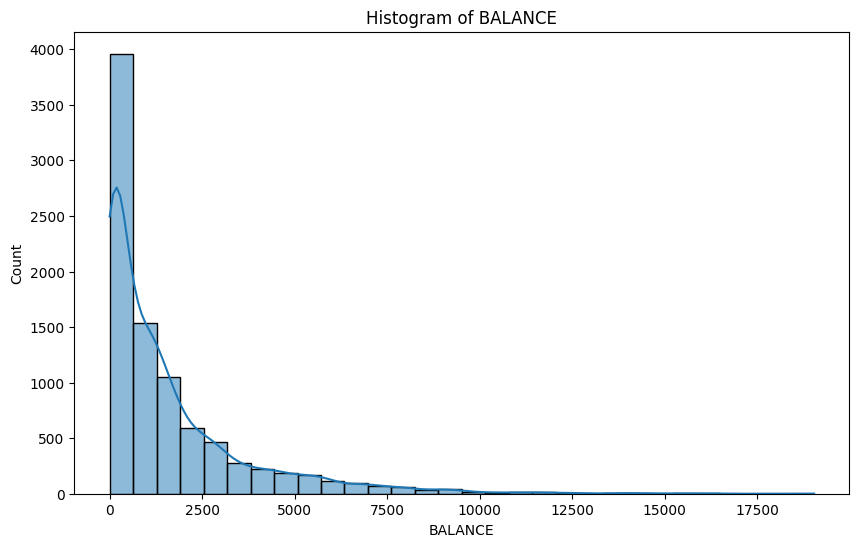

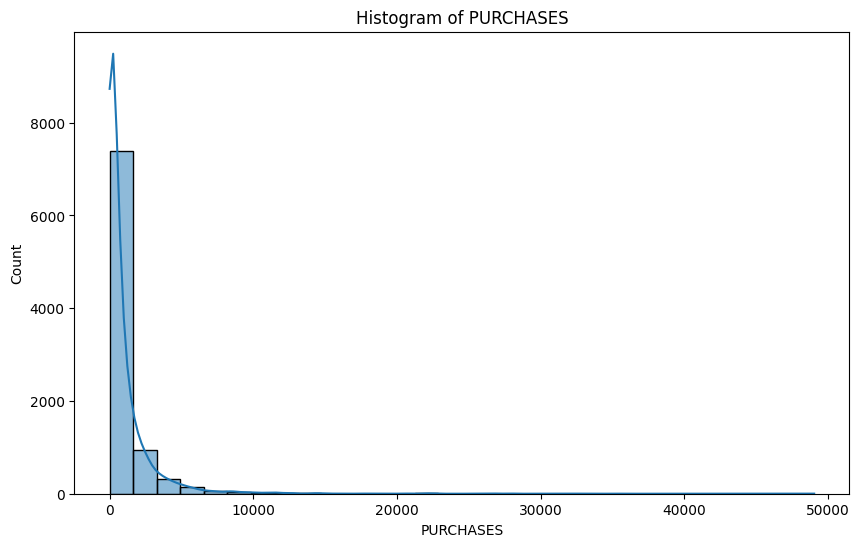

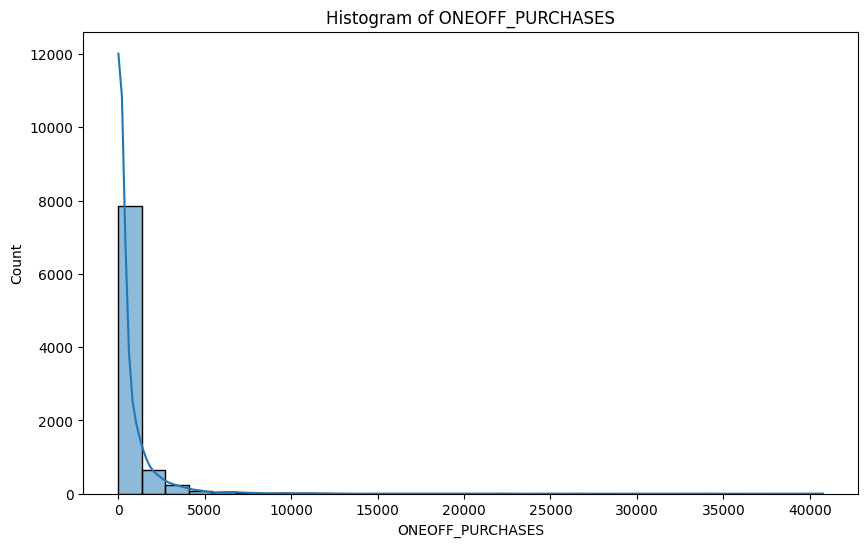

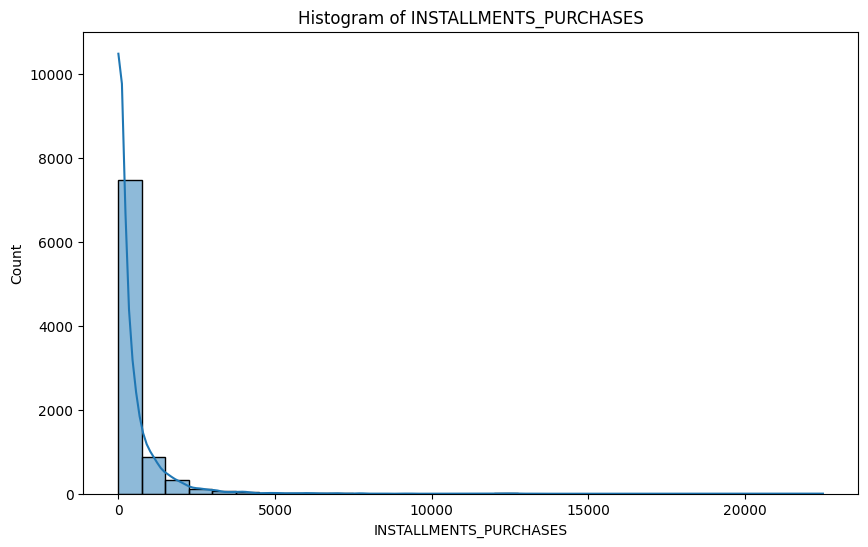

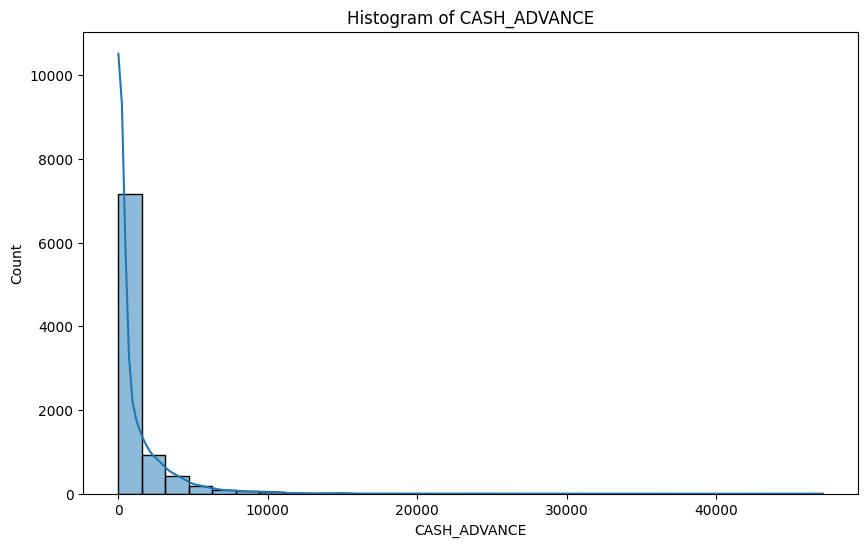

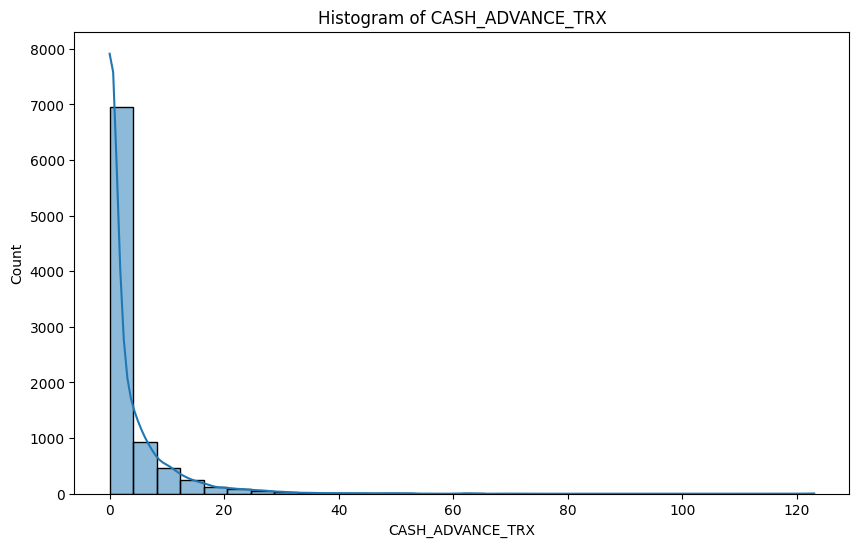

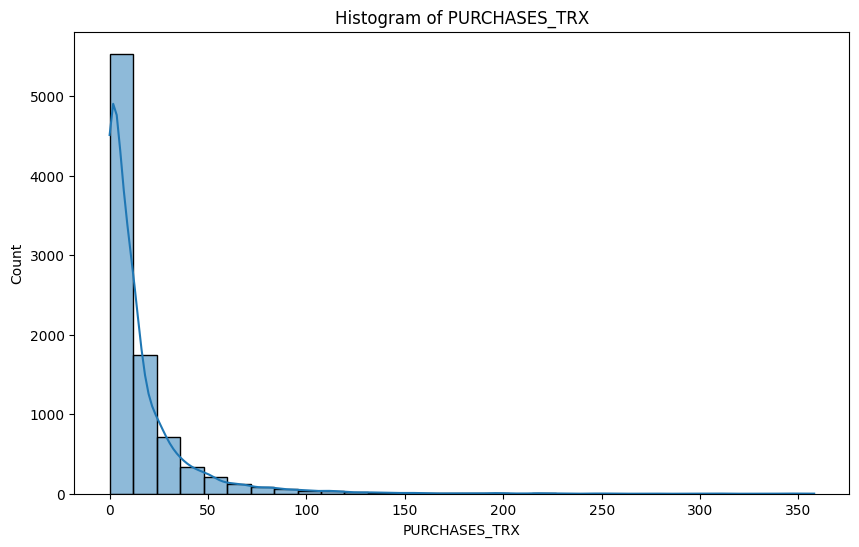

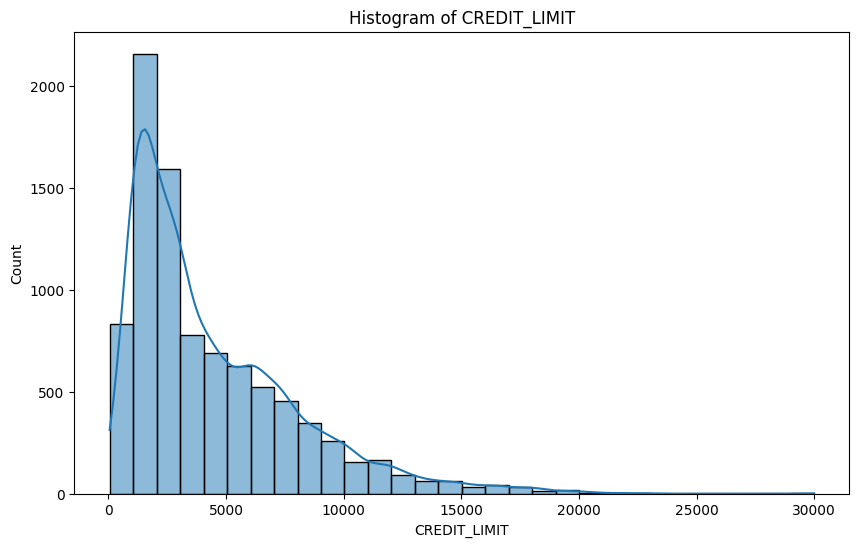

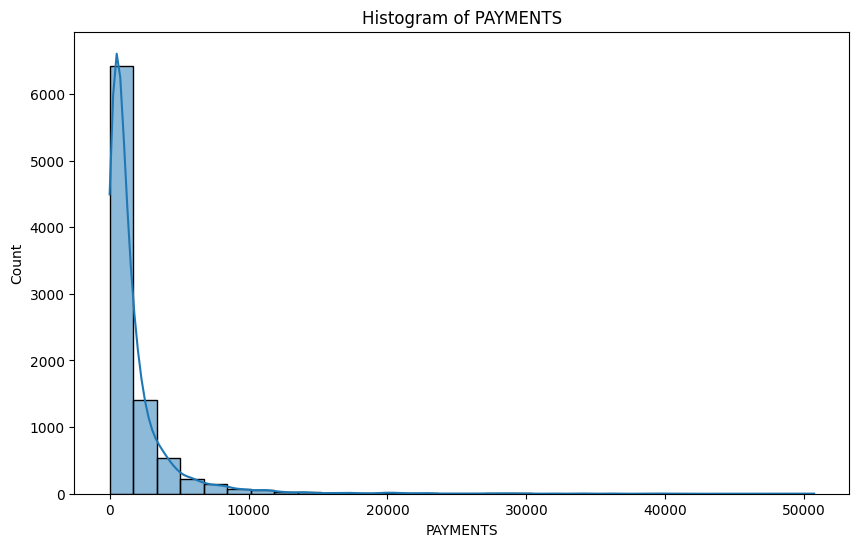

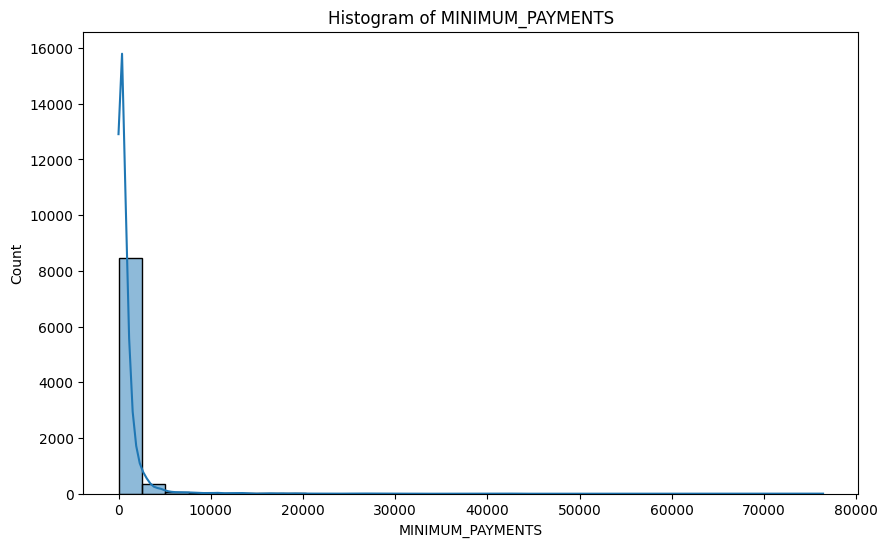

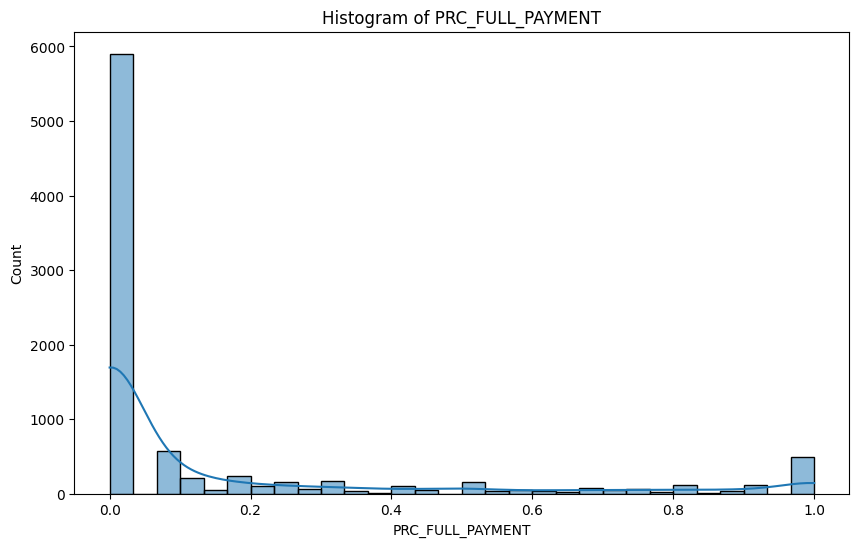

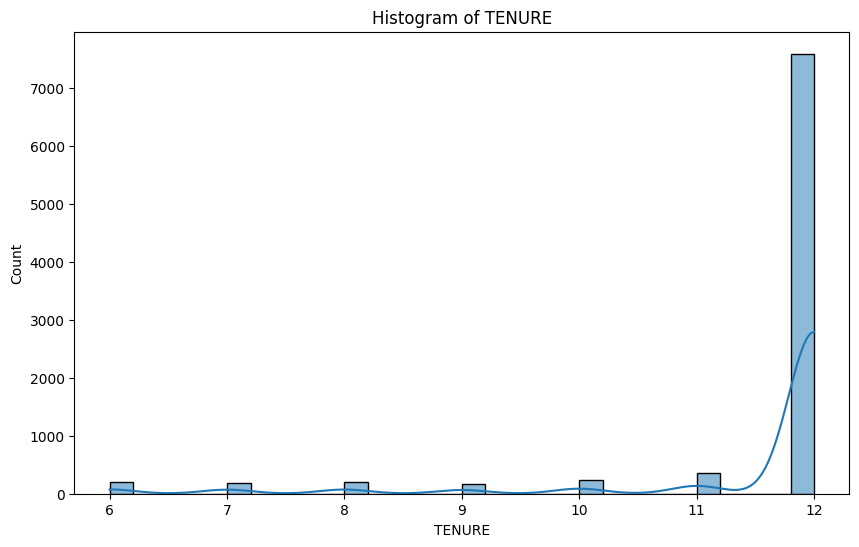

In [14]:
for col in df.columns:
    plt.figure(figsize=(10, 6))
    plt.title(f'Histogram of {col}')
    sns.histplot(df[col], bins=30, kde=True)
    plt.show()

## KMeans

#### Standardize data

In [15]:
from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit_transform(df)
df

array([[-0.73205404, -0.4249337 , -0.35695651, ..., -0.31099323,
        -0.52558844,  0.36054128],
       [ 0.78685815, -0.4695839 , -0.35695651, ...,  0.08926514,
         0.2341587 ,  0.36054128],
       [ 0.44704093, -0.10771601,  0.10884332, ..., -0.101699  ,
        -0.52558844,  0.36054128],
       ...,
       [-0.74046257, -0.40200016, -0.35695651, ..., -0.33548999,
         0.32912795, -4.12691899],
       [-0.74523857, -0.4695839 , -0.35695651, ..., -0.34693042,
         0.32912795, -4.12691899],
       [-0.57264377,  0.0420915 ,  0.30167699, ..., -0.33297104,
        -0.52558844, -4.12691899]])

### Elbow Method

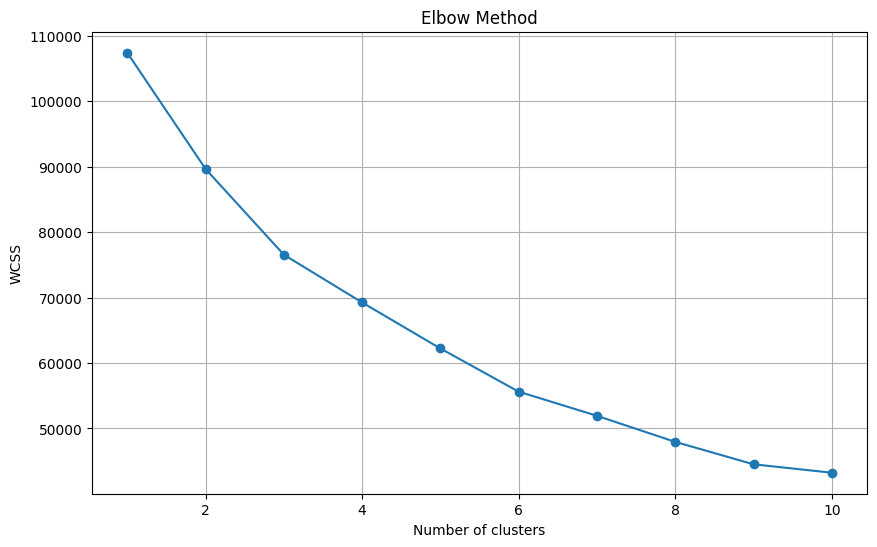

In [16]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    Kmeans = KMeans(n_clusters=i)
    Kmeans.fit(df)
    wcss.append(Kmeans.inertia_)  ## inertia_ is the WCSS
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')    
plt.title('Elbow Method')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
optimal_k = 4  # Replace with the optimal number of clusters from the elbow method

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df)  # Assigning clusters to the data points

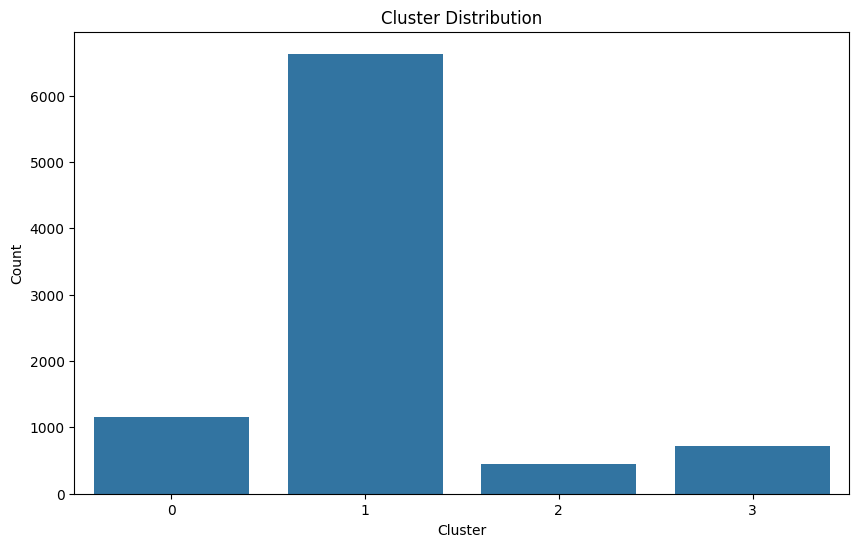

In [18]:
# countplot for cluster distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=clusters)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

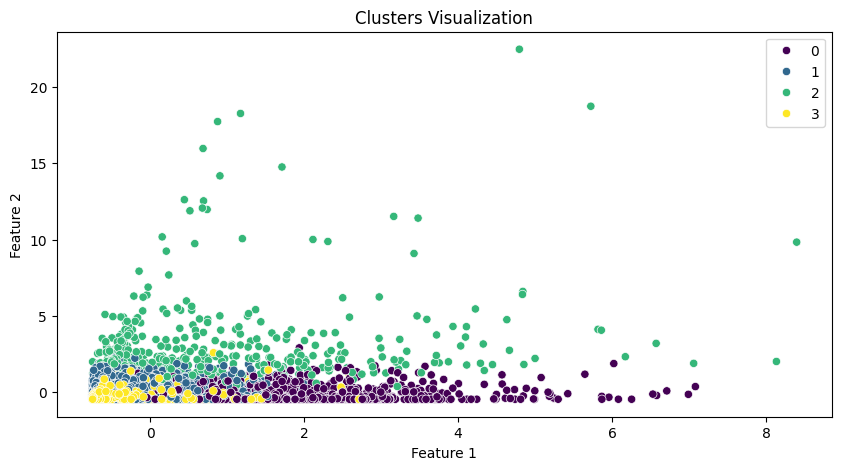

In [22]:
# scater plot for clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df[:, 0], y=df[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()